## Equity Portfolio Analysis

### Import Data

In [2]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from matplotlib import pyplot as plt
from scipy import stats

# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2025, 6, 18)

!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate = 'chrome')

# Get data (i.e. Bitcoin, NASDAQ and S&P500 indices)
df = yfin.download(["^GSPC", "^IXIC", "BTC-USD"], start, end, auto_adjust = False, session = session)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,^GSPC,^IXIC
Date,,,
2019-08-01,10399.668945,2953.560059,8111.120117
2019-08-02,10518.174805,2932.050049,8004.069824
2019-08-03,10821.726562,NaN,NaN
2019-08-04,10970.184570,NaN,NaN
2019-08-05,11805.653320,2844.739990,7726.040039


We'll compare returns instead of prices here for a couple of reasons:

- Return is a scale-free summary of an investment opportunity
- Returns have statistical properties that are easier to work with

Log Returns Formula: $$R_{\text{log}} = \ln \left( \frac{P_1}{P_0} \right)$$ 

Log returns are used because it is a common assumption in many financial models that returns are normally distributed, and log returns have good mathematical properties

In [5]:
# Remove rows with missing values
df.dropna(inplace = True)

# Calculate log returns
df["SP500"]   = np.log(df["^GSPC"]) - np.log(df["^GSPC"].shift(1))
df["NASDAQ"]  = np.log(df["^IXIC"]) - np.log(df["^IXIC"].shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))

# Remove original price columns
df.drop(["^GSPC",	"^IXIC", "BTC-USD"], axis = 'columns', inplace = True)

# Remove rows with missing values (again)
df.dropna(inplace = True)

# Display the first five rows
df.head()

Ticker,SP500,NASDAQ,Bitcoin
Date,,,
2019-08-02,-0.007309,-0.013286,0.011331
2019-08-05,-0.030230,-0.035354,0.115474
2019-08-06,0.012933,0.013784,-0.028132
2019-08-07,0.000767,0.003767,0.039612
2019-08-08,0.018588,0.022178,0.002044


### Variance and Standard Deviation

$$\sigma^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}$$
and 
$$\sigma = \sqrt{\sigma^2}$$

Standard deviation is a statistical measure to quantify market volatility

In [6]:
df.std()

Ticker
SP500      0.013380
NASDAQ     0.016077
Bitcoin    0.040243
dtype: float64

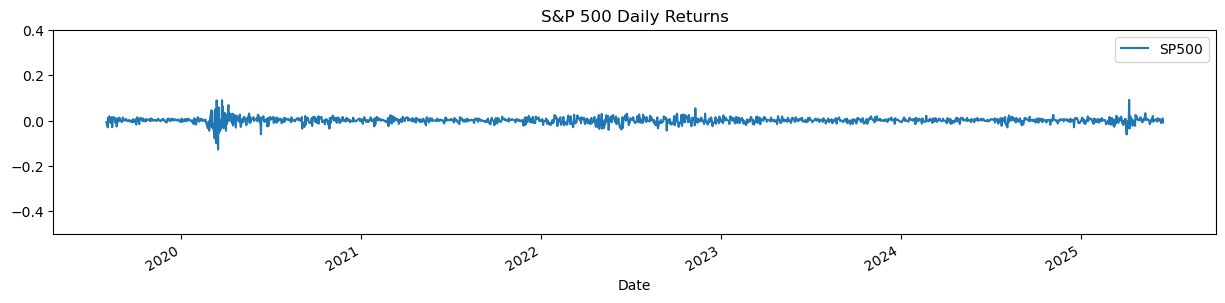

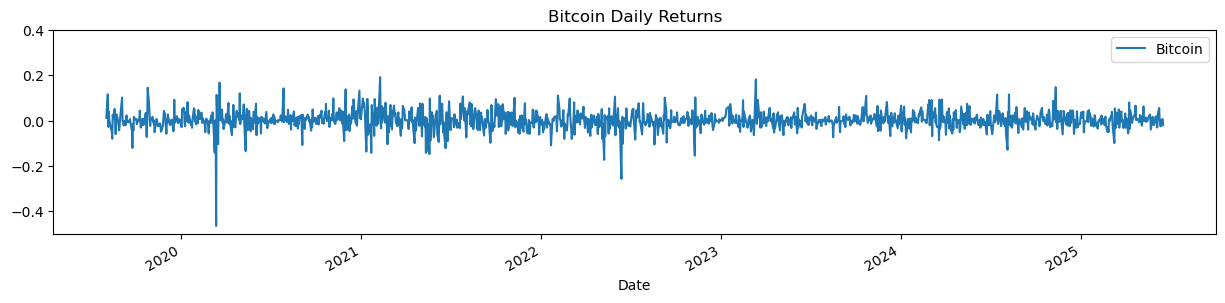

In [7]:
# Generate two plots
ax1 = df.plot(figsize = (15, 3), y = "SP500", title = "S&P 500 Daily Returns")
ax2 = df.plot(figsize = (15, 3), y = "Bitcoin", title = "Bitcoin Daily Returns")

# Set y-axis limits for both plots
ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

Standard deviation is preferred over variance because variance is a squared result of the units of return. Whilst standard deviation is in the same unit as the underlying data (i.e. returns).

A lower standard deviation is not necessarily preferable when considering investments. It all depends on the investor's risk preferences. A higher risk means a higher potential for rewards. Understanding the investor's perspective is key to determining what levels of risk an investor is comfortable with.

### Covariance and Correlation

Covariance provides some insight into how two variables move together. A positive covariance between stock returns would indicate that when one stock goes up, so does the other and vice versa. A negative covariance would mean that the two stocks move inversely, i.e., when one goes up, the other goes down.

$$Cov(X, Y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N-1}$$

In [9]:
df.cov()

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,0.000179,0.000204,0.000196
NASDAQ,0.000204,0.000258,0.000251
Bitcoin,0.000196,0.000251,0.001620


Pearson correlation coefficient is a measure of the strength of a linear relationship between two variables

$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

Correlation is used to quantify the degree to which two variables move in a linear relation to each other. Correlation can range from –1 to 1 inclusive. A correlation of 1 means perfect correlation; the variables move exactly in tandem with one another. A correlation of -1 indicates perfect inverse correlation. A correlation of 0 indicates there is no linear distinguishable relationship between two variables; therefore, it would be impossible to make predictions of one variable given the other.

In [10]:
round(df.corr(), 3)

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,1.000,0.950,0.365
NASDAQ,0.950,1.000,0.388
Bitcoin,0.365,0.388,1.000


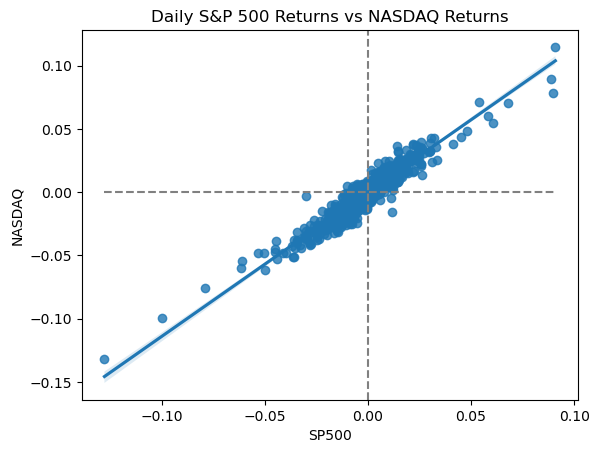

In [13]:
# Create scatter plot with regression line
sns.regplot(x = "SP500", y = "NASDAQ", data = df).set( title = "Daily S&P 500 Returns vs NASDAQ Returns")

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle = "butt", linestyle = "--", color = "grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle = "--", color = "grey");

The above plot visually shows the relationship between the daily log returns of the S&P 500 and NASDAQ, including a regression line that represents the best-fit linear relationship between the two variables. There are confidence intervals around the regression line. The dashed lines at x=0 and y=0 help to visualize the positive and negative returns for each asset. This relationship shows nearly perfect correlation.

### Sharpe Ratio

The Sharpe ratio allows an investor to understand the relationship between the return of an investment and its volatility
$$SR = \frac{R_p - R_f}{\sigma_p}$$
This measure is used as a way of scaling the return of an investment depending on how much risk is taken

In [15]:
# Calculates the Sharpe Ratios for both the S&P 500 and Bitcoin
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()

# Print the results
print("Sharpe Ratio of S&P 500: ", round(Sharpe_Ratio_SP500, 3))
print("Sharpe Ratio of Bitcoin: ", round(Sharpe_Ratio_Bitcoin, 3))

Sharpe Ratio of S&P 500:  0.036
Sharpe Ratio of Bitcoin:  0.039


One major flaw with the Sharpe ratio is that it uses the standard deviation of returns in the denominator, which assumes that returns are normally distributed. This may not always--and is actually rarely--the case

### Semivariance (Downside Risk)

Semivariance is an even better measure of risk-adjusted returns than sharpe ratio and a more refined version of a standard deviation. Standard deviation looks at both the upside and downside risk of an investment. Most investors, unless you're trading short, care much more about the downside risk than the upside risk.
$$\text{Semivariance} = \frac{1}{n} \sum^n_{r_i < \bar{r}} (r_i - \bar{r} )^2$$

Can be used to estimate the average loss a portfolio could incur, assuming normal distributions of returns.

Conversely, if we are short a security, we could still use semivariance, but this time focus on the returns that are positive

In [16]:
# Calculate the mean return for each
sp500mean = df["SP500"].mean()
BTCmean = df["Bitcoin"].mean()

# Calculate semivariance for each
sp500_semivariance = ((df[df["SP500"] < sp500mean]["SP500"] - sp500mean) ** 2).mean()
BTC_semivariance = ((df[df["Bitcoin"] < BTCmean]["Bitcoin"] - BTCmean) ** 2).mean()

# Print the semivariance results
print("Semivariance of S&P 500: ", round(sp500_semivariance, 5))
print("Semivariance of Bitcoin: ", round(BTC_semivariance, 5))

Semivariance of S&P 500:  0.00021
Semivariance of Bitcoin:  0.00169


### Test for Normality (for S&P500 Index)

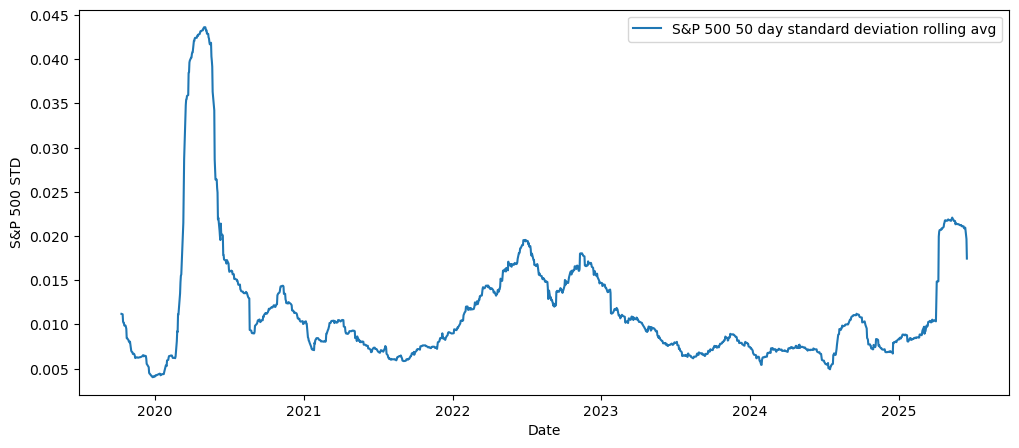

In [20]:
# Calculate rolling 50-day standard deviation
vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns = {"SP500": "S&P 500 STD"})

# set figure size and plot rolling standard deviations
plt.figure(figsize = (12, 5))
sns.lineplot(
    x     = "Date",
    y     = "S&P 500 STD",
    data  = vols,
    label = "S&P 500 50 day standard deviation rolling avg",
)
plt.show()

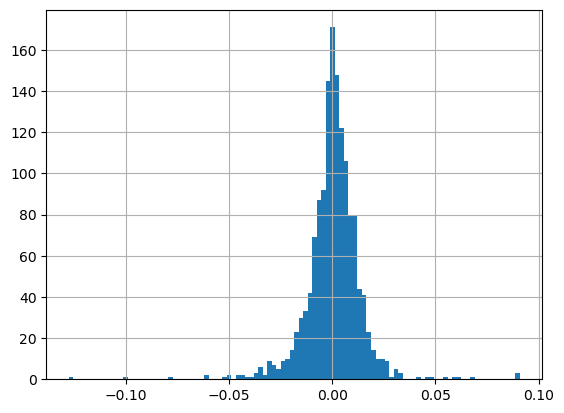

In [22]:
df.SP500.hist(bins=100);

The D'Agostino and Pearson's normality test combines skew and kurtosis to produce an omnibus test of normality. It produces 2 values:
- Statistic: A test statistic that measures the deviation from normality. Higher values indicate a greater deviation.
- p-value: The probability of observing the data if it were truly normally distributed. A small p-value (typically less than 0.05) suggests that the data is not normally distributed.

In [23]:
stats.normaltest((np.array(df.SP500)))

NormaltestResult(statistic=409.94487747251986, pvalue=9.585194162499055e-90)

Can test the skewness and kurtosis of our distribution using the Jarque-Bera test. The test statistic will always be greater than zero. The further the test statistic is from zero, the more likely the sample data does not match a normal distribution.

A small p-value (typically less than 0.05) indicates that the data is likely not normally distributed.

In [24]:
stats.jarque_bera((np.array(df.SP500))).pvalue

0.0

Our data might fail normality test due to fat tails. Fat tails essentially mean that extreme events (+/-3 standard deviations away from the mean) are more likely than the normal distribution would imply.

In a normal distribution, you'd rarely observe data points more than 3 standard deviations away from the mean. This information is crucial for risk management and modeling, as relying on the assumption of normality can lead to underestimating the probability of extreme events and potential losses.

One potential alternative distribution could use to forecast stock returns is the Student's t-distribution. This is very similar to a normal distribution except it has heavier tails. A leptokurtic distribution has fatter tails and a sharper peak than a normal distribution. It also has kurtosis greater than 3. Can calibrate the parameters of the Student's t-distribution using Maximum Likelihood Estimation (MLE)

### Cholesky Factorization

Cholesky factorization is a method to decompose a symmetric matrix. Cholesky factorization states that a symmetric positive definite matrix 
$S$ can be decomposed as follows: $$\bf{S} = \bf{LL}^T $$
where $L$ - a lower triangular matrix/a Cholesky factor

In [26]:
#Example
S = np.array([[25,15,-5],
             [15,18,0],
             [-5,0,11]])

L_numpy = np.linalg.cholesky(S)
print("\nNumPy Cholesky factor:")
print(L_numpy)


NumPy Cholesky factor:
[[ 5.  0.  0.]
 [ 3.  3.  0.]
 [-1.  1.  3.]]


Cholesky factorization is useful in Monte Carlo simulations or other optimization tasks. We'll use Cholesky factorization in a Monte Carlo simulation to generate correlated random variables. The process involves the following steps:
1. Compute the Cholesky factorization of the stock return correlation matrix to get the factor L.
2. Generate independent standard normal random variable Z.
3. Compute X = LZ to get correlated random variables.

In [43]:
#Import returns from Barloworld and Naspers
stocks = yfin.download(["NPN.JO", "BAW.JO"], start, end, auto_adjust = False, session = session)["Adj Close"]
stocks.index = pd.to_datetime(stocks.index).strftime("%Y-%m-%d") #Index date

#Calculate returns
stocks_returns = stocks.dropna().pct_change()
stocks_returns = stocks_returns.dropna()

stocks_returns

[*********************100%***********************]  2 of 2 completed


Ticker,BAW.JO,NPN.JO
Date,,
2019-08-02,-0.004447,-0.036250
2019-08-05,-0.020819,-0.045840
2019-08-06,-0.028665,-0.003582
2019-08-07,0.024459,0.009586
2019-08-08,-0.011246,0.023736
...,...,...
2025-06-10,0.005581,-0.003318
2025-06-11,-0.001758,0.004062
2025-06-12,0.006394,0.000232


In [44]:
## Method 1: Original correlation of returns
orig_corr = stocks_returns.corr()

orig_corr

Ticker,BAW.JO,NPN.JO
Ticker,,
BAW.JO,1.000000,0.183692
NPN.JO,0.183692,1.000000


In [45]:
## Method 2: Simulation using Cholesky factorization

# Create a function to generate random samples from correlated variables
def generate_correlated_samples(n_samples, correlation_matrix):
    L = np.linalg.cholesky(correlation_matrix) # Compute Cholesky factorization

    Z = np.random.standard_normal((correlation_matrix.shape[0], n_samples)) # Generate independent standard normal samples

    X = L @ Z # Generate correlated samples
    return X


# Generate samples
n_samples = 10000
X = generate_correlated_samples(n_samples, orig_corr)

X = pd.DataFrame(generate_correlated_samples(n_samples, orig_corr).T, columns = ["NPN","BAW"]) #Convert to dataframe

# Compute sample correlation
sample_correlation = X.corr()
sample_correlation

,NPN,BAW
NPN,1.000000,0.178852
BAW,0.178852,1.000000


We can see that the correlation values of the original data and the simulated data are very close

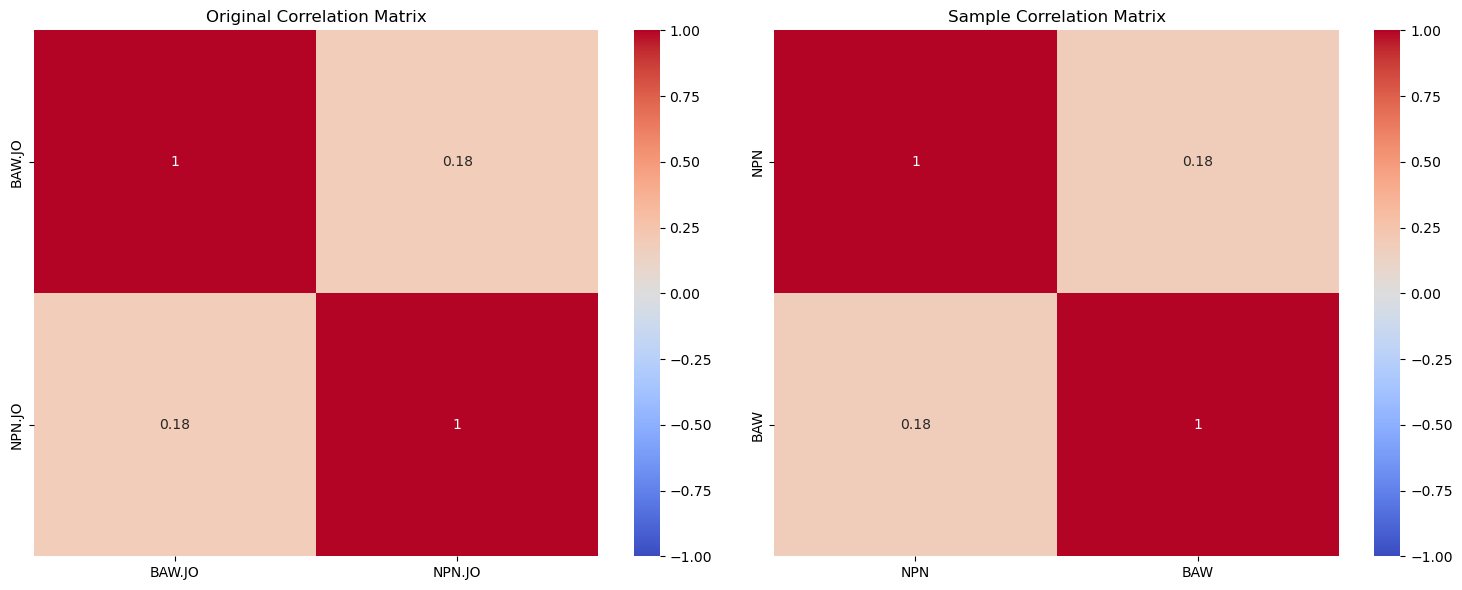

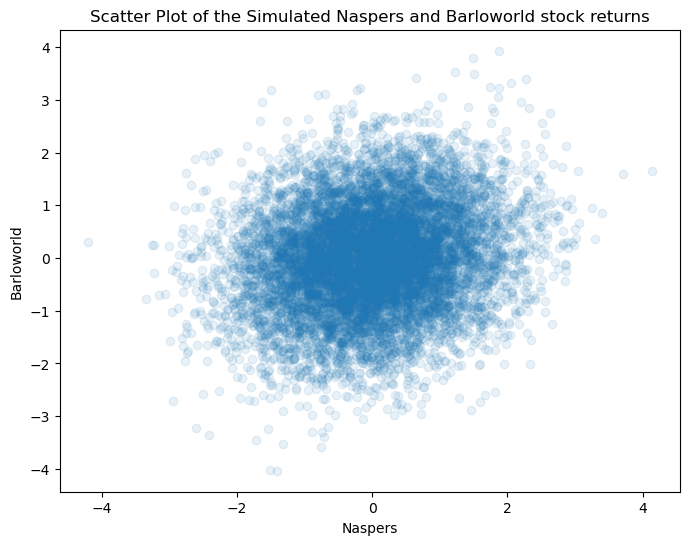

In [46]:
# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

sns.heatmap(orig_corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, ax = ax1)
ax1.set_title('Original Correlation Matrix')
ax1.set(xlabel = '', ylabel = '')


sns.heatmap(sample_correlation, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, ax = ax2)
ax2.set_title('Sample Correlation Matrix')
ax2.set(xlabel = '', ylabel = '')

plt.tight_layout()
plt.show()

# Scatter plot of the stimulated Apple and Ford Motor stock returns
plt.figure(figsize = (8, 6))
plt.scatter(X["NPN"], X["BAW"], alpha=0.1)
plt.title('Scatter Plot of the Simulated Naspers and Barloworld stock returns')
plt.xlabel('Naspers')
plt.ylabel('Barloworld')
plt.show()

### Total and Dividend-Adjusted Returns

$$\text{Total Returns = } \frac{(P_T - P_0) + (D + I)}{P_0}$$
where 
- D is dividends
- I is any form of additional income the specific investment provides

$$\text{Dividend Adjusted Returns = } \frac{(P_T - P_0) + D}{P_0}$$

The adjusted-close (assuming no splits) is $$P_t^{\text{adj}} = P_t^{\text{close}} - \sum_{i>t} D_i$$
i.e. at any given time $t$, we need to subtract all dividends that are paid from time $t$ and on. Calculating the adjusted-close is a backwards-looking procedure.

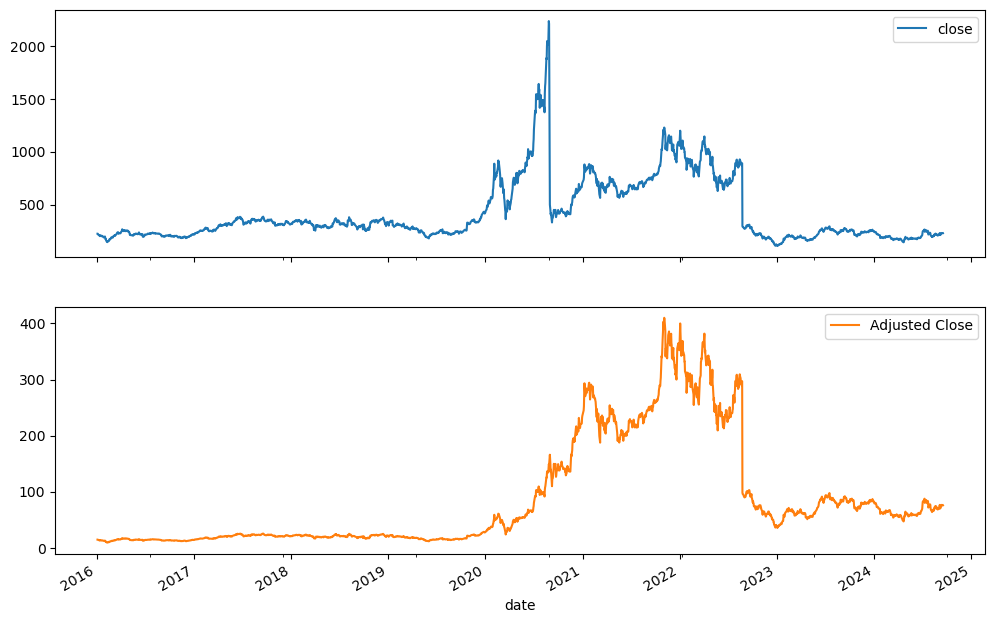

In [3]:
tsla = pd.read_csv("https://raw.githubusercontent.com/DonLeKouT/Just_files/refs/heads/main/TSLA_stock_price.csv")
tsla.set_index('date', inplace=True)
tsla.index = pd.to_datetime(tsla.index)

splits = {'2025-06-20' : 3, "2020-08-31" : 5} # The dates and multiplier of TSLA splits

tsla['Adjusted Close'] = tsla['close'].copy()

for date, split in splits.items():
    date = pd.to_datetime(date) - pd.Timedelta(days=1)
    tsla.loc[:date, 'Adjusted Close'] = tsla.loc[:date, 'Adjusted Close'] / split

tsla[['close', 'Adjusted Close']].loc["2016":].plot(figsize=(12, 8), subplots = True)
plt.show()

### Excess Returns

Excess return is the difference between the returns of an asset (or portfolio) and a benchmark. $$\text{Excess Returns } = r_{\text{portfolio}} - r_{\text{benchmark}}$$
The benchmark is case specific and can be represented by any asset an analyst decides to test the returns of their investment against.

The expected return of an asset represents the return an investor expects/requires given the risk profile of the specific asset. Thus, in calculating the expected return, one can take into account the systematic risk, inflation expectations, interest rate risk, and more. If the actual returns of the asset are greater than expected returns, then the asset has outperformed expectations.
$$\text{Excess Returns } = r_{\text{actual}} - \mathbb{E}[r_{\text{asset}}]$$
where:

1) CAPM
The capital asset pricing model (CAPM) models returns with respect to systematic risk
$$\mathbb{E}[r_{\text{asset}}] = r_f + \beta (r_m - r_f)$$
where
- $r_f$ is risk-free rate
- $r_m$ is market proxy
- $\beta$ is sensitivity of asset to market returns
The excess return is $$\alpha = r_{\text{actual}} - \left( r_f + \beta(r_m - r_f) \right)$$

2) APT
The arbitrage pricing theory (APT) goes beyond the CAPM model in incorporating multiple factors of risk instead of just the systematic one (market). These factors could be any macroeconomic variable such as inflation, interest rates, economic growth, etc.
$$\mathbb{E}[r_{\text{asset}}] = r_f + \beta_1 f_1 + \beta_2 f_2 + ... + \beta_n f_n$$
where
- $f_i$ are factor risk premiums
- $\beta_i$ are sensitives of the asset to these factors

3) Fama-French Three-Factor Model
The model extends CAPM by adding two additional factors:
- SMB (small minus big) factor, which is the difference between small-cap and large-cap stocks (i.e. size premium).
- HML (high minus low) factor, which measures the difference between the returns of the value and growth stocks.
  $$\mathbb{E}[r_{\text{asset}}] = r_f + \beta_{\text{market}}(r_m - r_f) + \beta_{\text{size}} \times \text{SMB} + \beta_{\text{value}} \times \text{HML}$$

### Value at Risk (VaR)

Value at Risk measures the potential loss in value of an asset/portfolio over a defined time period. Basically, you will always need to specify the time period and confidence interval that accompanies a Value at Risk. For example, if the VaR of a portfolio is $R1,000,000$ over a yearly time period with a 99% confidence interval, it would mean that the portfolio only has a 1% chance of losing more than $1,000,000 for any given year.

There are three basic methods for calculating VaR:
- Historical Method
- Parametric Method
- Monte Carlo Simulation